In [106]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from spoint.utils.primitives import Primitives
from spoint.utils.homography import Homography
from spoint.utils.config import Config
    
def draw_points(image, points):
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    for p in points:
        image = cv2.circle(image, (p[1], p[0]), 16, (255,0,0), -1) 
    
    plt.imshow(image)
    plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Render primiteve

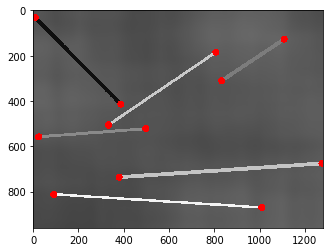

In [113]:
image, points = Primitives(['lines', 'polygon', 'ellipses', 'star', 'stripes', 'cube', 'checkerboard'])()
draw_points(image, points)

## Test perspective

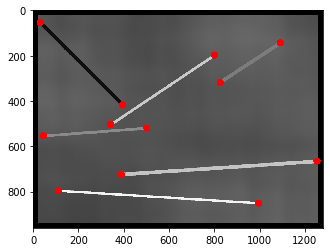

In [117]:
config = Config({
    'patch': {'ratio': 0.9},
    'perspective': {'prob': 1.0, 'dx': 0.5, 'dy': 0.5, 'artifacts': True},
})

warp_image, warp_points = Homography(config)(image, points)
draw_points(warp_image, warp_points)

## Test rotation

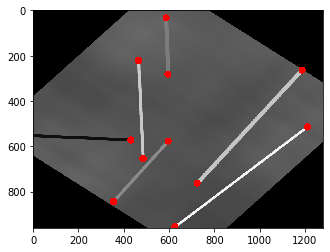

In [118]:
config = Config({
    'patch': {'ratio': 0.9},
    'rotation': {'prob': 1.0, 'max_angle': 1.57, 'num_angles': 10, 'artifacts': True}
})

warp_image, warp_points = Homography(config)(image, points)
draw_points(warp_image, warp_points)

## Test scaling

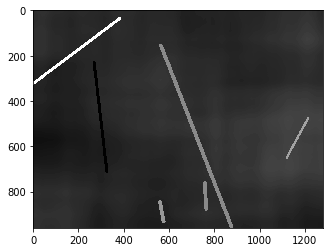

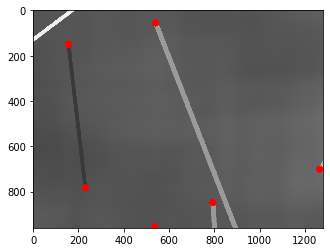

In [99]:
config = Config({
    'patch': {'ratio': 0.9},
    'scaling': {'prob': 1, 'scale': 1, 'num_scales': 10, 'std': 2, 'artifacts': True}
})

warp_image, warp_points = Homography(config)(image, points)

draw_image(image)
draw_points(warp_image, warp_points)

## Test translation

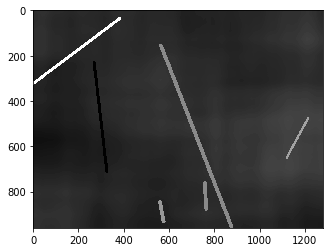

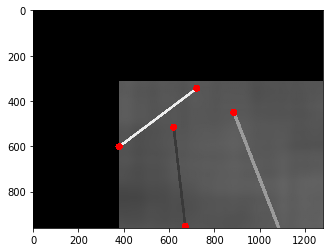

In [101]:
config = Config({
    'patch': {'ratio': 0.9},
    'translation': {'prob': 1, 'overflow': 0.5, 'artifacts': True}
})

warp_image, warp_points = Homography(config)(image, points)

draw_image(image)
draw_points(warp_image, warp_points)

## Test random homography

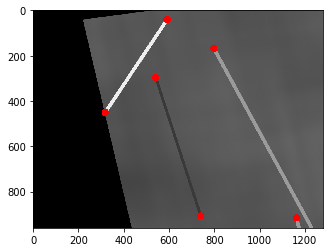

In [105]:
config = Config({
    'patch': {'ratio': 0.9},
    'rotation': {'prob': 0.5, 'max_angle': 1.57, 'num_angles': 10, 'artifacts': True},
    'perspective': {'prob': 0.5, 'dx': 0.5, 'dy': 0.5, 'artifacts': True},
    'scaling': {'prob': 0.5, 'scale': 10, 'num_scales': 10, 'std': 2, 'artifacts': True},
    'translation': {'prob': 0.5, 'overflow': 0.5, 'artifacts': True}
})

warp_image, warp_points = Homography(config)(image, points)
draw_points(warp_image, warp_points)